In [1]:
import numpy as np
import pandas as pd


%matplotlib inline

In [2]:
can_df = pd.read_csv("data.csv")        #"Breast cancer 1990-2015.csv")
countires_df = pd.read_csv("countires-ms.csv")

In [3]:
can_df.shape

(195, 11)

In [4]:
can_df.rename(columns={"super region":"super_region"},inplace=True)

In [5]:
can_df.head(10)

,Location,region,super_region,Cause of death or injury,Measure,1990,1995,2000,2005,2010,2015
0,Afghanistan,5,2,Breast cancer,"Deaths per 100,000",8.855529,10.314771,10.202057,11.163378,12.163001,13.847518
1,Albania,15,6,Breast cancer,"Deaths per 100,000",6.355969,7.498586,9.420784,11.921283,14.130476,14.237670
2,Algeria,5,2,Breast cancer,"Deaths per 100,000",3.758565,4.166056,4.779386,5.817597,6.148199,6.629544
3,American Samoa,9,4,Breast cancer,"Deaths per 100,000",9.070924,10.203181,11.812755,12.317291,13.462816,14.136467
4,Andorra,18,7,Breast cancer,"Deaths per 100,000",28.981947,28.628844,27.175940,26.233812,26.873845,29.713003
5,Angola,4,1,Breast cancer,"Deaths per 100,000",7.419899,7.236125,7.074025,7.454270,8.048010,8.468046
6,Antigua and Barbuda,12,5,Breast cancer,"Deaths per 100,000",17.379472,19.808013,20.315776,19.733605,21.525910,22.286052
7,Argentina,17,7,Breast cancer,"Deaths per 100,000",25.545747,26.845571,28.528966,28.887161,29.211433,30.582809
8,Armenia,16,6,Breast cancer,"Deaths per 100,000",18.686014,24.506074,30.568219,33.058965,33.353068,34.109180
9,Australia,20,7,Breast cancer,"Deaths per 100,000",28.451471,28.859416,27.693238,26.868726,26.842958,27.642844


In [6]:
super_regions_dict = {1:"Sub-Saharan Africa",
                2:"North Africa and Middle East",
                3:"South Asia",
                4:"Southeast Asia, East Asia, and Oceania",
                5:"Latin America and Caribbean",
                6:"Central Europe, Eastern Europe, and Central Asia",
                7: "High-income" }


regions_dict = {1: "Eastern Sub-Saharan Africa",
           2: "Western Sub-Saharan Africa",
           3: "Southern Sub-Saharan Africa",
           4:  "Central Sub-Saharan Africa" , 
           5: "North Africa and Middle East",
           6: "South Asia",
           7: "Southeast Asia",
           8: "East Asia",
           9: "Oceania",
           10: "Central Latin America",
           11: "Andean Latin America",
           12: "Caribbean",
           13: "Tropical Latin America",
           14: "Eastern Europe",
           15: "Central Europe",
           16: "Central Asia",
           17: "Southern Latin America",
           18: "Western Europe",
           19: "High-income Asia Pacific",
           20: "Australasia",
           21: "High-income North America"}


    
sr_to_r_dict = {1: "1 , 2 , 3, 4", 
                2: "5 ", 
                3: "6 ", 
                4: "7 , 8 , 9 ",
                5: "10 , 11 , 12 ,13",
                6: "14, 15, 16",
                7: "17 , 18, 19,20,21"}


## Statistics Summary for Countries

In [7]:
country_year_stat_df = can_df.describe()
country_year_stat_df#.iloc[1:,2:]

,region,super_region,1990,1995,2000,2005,2010,2015
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,9.697436,4.035897,14.384126,15.278910,16.000009,16.487400,17.128279,18.085396
std,5.970351,2.220742,11.958872,12.244737,12.153728,11.879642,11.896774,12.299251
min,1.000000,1.000000,2.753079,2.954828,3.220861,3.166803,2.781509,2.916943
25%,5.000000,2.000000,5.957671,6.231439,6.764640,6.931882,7.321090,7.806305
50%,9.000000,4.000000,8.855529,9.977340,10.718405,11.765315,12.725042,13.693531
75%,15.000000,6.000000,19.842728,23.301032,24.548895,25.595765,26.858402,28.356143
max,21.000000,7.000000,56.108518,57.178526,53.376472,48.898353,48.249640,51.890372


In [8]:
country_stat_df = can_df.iloc[:,5:].transpose().describe()
country_stat_df.columns = can_df.iloc[:,0]
country_stat_df

Location,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,"Virgin Islands, U.S.",Yemen,Zambia,Zimbabwe
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,11.091042,10.594128,5.216558,11.833906,27.934565,7.616729,20.174805,28.266948,29.046920,27.726442,...,30.391106,42.057202,7.759292,12.955735,10.785875,7.816653,30.337418,7.011843,8.267922,8.353174
std,1.740281,3.360464,1.152922,1.922632,1.366387,0.532028,1.699753,1.796320,6.173296,0.816531,...,2.217761,2.894429,0.833627,2.292725,2.480504,1.186875,8.661899,1.219335,0.396408,1.348552
min,8.855529,6.355969,3.758565,9.070924,26.233812,7.074025,17.379472,25.545747,18.686014,26.842958,...,28.232849,38.619622,6.599745,10.187449,7.736289,6.304368,19.189520,5.226937,7.582888,6.526976
25%,10.230236,7.979135,4.319388,10.605574,26.949369,7.282068,19.752207,27.266420,26.021610,27.062256,...,28.896082,40.413482,7.178833,11.305138,9.094524,6.959607,24.778314,6.293021,8.119402,7.664356
50%,10.739074,10.671034,5.298492,12.065023,27.902392,7.437084,20.061895,28.708063,31.813592,27.668041,...,29.565368,41.568384,7.856393,12.707069,10.490904,7.799499,29.628362,7.140039,8.408925,8.118709
75%,11.913095,13.578178,6.065548,13.176435,28.893671,7.899575,21.223377,29.130365,33.279543,28.261913,...,31.928789,43.148757,8.384286,14.556931,12.409420,8.641747,35.591532,7.753724,8.491443,9.213632
max,13.847518,14.237670,6.629544,14.136467,29.713003,8.468046,22.286052,30.582809,34.109180,28.859416,...,33.593472,46.882758,8.729989,16.121443,14.319162,9.394415,42.837375,8.595076,8.664951,10.263141


## Statistics Summary for Regions

In [9]:
region_stat_df = can_df.iloc[:,5:].groupby(can_df.region).describe()
region_stat_df 

1990                                                         \
       count       mean        std        min        25%        50%   
region                                                                
1       15.0   5.944458   1.750229   3.705928   4.842270   5.651425   
2       19.0   5.701192   1.244964   3.711994   4.839011   5.428219   
3        6.0   7.632488   3.618386   2.753079   6.470423   7.302722   
4        6.0  10.304032   2.786345   6.611646   8.129173  11.061783   
5       21.0   6.914859   3.145336   2.861003   3.814077   6.566643   
6        5.0   6.120680   3.490154   4.311342   4.345467   4.569544   
7        3.0   7.729343   1.209198   6.336522   7.338724   8.340927   
8       13.0   8.064168   4.092984   4.138484   6.200268   7.608249   
9       12.0  10.460847   5.017560   5.740565   8.878021   9.299438   
10       9.0   6.173249   2.132395   3.273716   4.205912   6.270713   
11       3.0   5.966921   0.957985   4.964089   5.514048   6.064007   
12      18.0  16.520112   6.616125   5.255278  15.727578  16.645009   
13       2.0   8.577304   1.414043   7.577425   8.077364   8.577304   
14       7.0  24.686435   3.456494  19.838504  21.994023  25.336319   
15      13.0  24.738864   9.112005   6.355969  20.351177  24.075965   
16       9.0  10.882433   7.080529   3.965913   5.893518   9.781200   
17       3.0  25.543181  13.077724  12.464174  19.004961  25.545747   
18      22.0  37.574778   9.998410  19.063085  29.743129  35.482492   
19       4.0   9.481068   3.229443   5.980680   7.359684   9.333466   
20       2.0  31.674182   4.557601  28.451471  30.062826  31.674182   
21       3.0  28.517351   8.849211  18.299233  25.946352  33.593472   

                              1995               ...           2010  \
              75%        max count       mean    ...            75%   
region                                           ...                  
1        6.252393  10.298415  15.0   6.128578    ...       6.979323   
2        6.328697   8.265368  19.0   5.747798    ...       7.161248   
3        8.111156  13.862783   6.0   7.580541    ...      13.119580   
4       11.918397  13.733412   6.0  10.012728    ...      11.649811   
5        9.154584  13.338088  21.0   7.584881    ...      11.583009   
6        5.034350  12.342696   5.0   6.792036    ...       6.762774   
7        8.425754   8.510581   3.0   8.750891    ...      13.454431   
8        8.348515  19.846953  13.0   9.220206    ...      16.335033   
9       10.173340  25.808008  12.0  11.418506    ...      15.841275   
10       7.967318   8.833645   9.0   6.915217    ...      11.650334   
11       6.468337   6.872666   3.0   6.587334    ...       8.561506   
12      17.414531  31.543127  18.0  18.438770    ...      26.744878   
13       9.077243   9.577183   2.0   9.553620    ...      14.122919   
14      27.268486  29.105204   7.0  28.458074    ...      32.527208   
15      31.091101  39.713088  13.0  27.042697    ...      39.014895   
16      12.919211  25.292582   9.0  11.710956    ...      17.891086   
17      32.082685  38.619622   3.0  26.610229    ...      36.406879   
18      45.492498  56.108518  22.0  38.040113    ...      41.136155   
19      11.454850  13.276661   4.0  10.568688    ...      19.407353   
20      33.285537  34.896893   2.0  31.323114    ...      30.137467   
21      33.626410  33.659348   3.0  28.504139    ...      30.162696   

                   2015                                              \
              max count       mean        std        min        25%   
region                                                                
1        8.859661  15.0   6.646347   1.808080   3.318387   5.634185   
2        8.947117  19.0   6.334952   1.809930   3.432100   5.027486   
3       15.441611   6.0  11.354858   5.448273   2.916943   8.607705   
4       12.725042   6.0  10.674124   2.628137   6.479230   9.175172   
5       20.114986  21.0   9.718366   4.003657   4.182735   6.726819   
6       17.526647   5.0   9.13

In [10]:
region_stat_df['region_name'] = list (regions_dict.values())
region_stat_df.rename(columns={'region':'index','region_name':'region'}, inplace=True)
region_stat_df.set_index('region', inplace=True)

In [11]:
items = []
for aa in range(6):
    items.append((str(1990 + aa * 5), 'mean'))
    items.append((str(1990 + aa * 5), 'std'))

filtered_region_statdf = region_stat_df .filter(items=items)
filtered_region_statdf

1990                  1995             \
                                   mean        std       mean        std   
region                                                                     
Eastern Sub-Saharan Africa     5.944458   1.750229   6.128578   1.784522   
Western Sub-Saharan Africa     5.701192   1.244964   5.747798   1.241795   
Southern Sub-Saharan Africa    7.632488   3.618386   7.580541   3.656643   
Central Sub-Saharan Africa    10.304032   2.786345  10.012728   2.859815   
North Africa and Middle East   6.914859   3.145336   7.584881   3.430203   
South Asia                     6.120680   3.490154   6.792036   4.293121   
Southeast Asia                 7.729343   1.209198   8.750891   1.627712   
East Asia                      8.064168   4.092984   9.220206   4.697905   
Oceania                       10.460847   5.017560  11.418506   5.567505   
Central Latin America          6.173249   2.132395   6.915217   2.308212   
Andean Latin America           5.966921   0.957985   6.587334   0.872423   
Caribbean                     16.520112   6.616125  18.438770   7.430582   
Tropical Latin America         8.577304   1.414043   9.553620   1.727767   
Eastern Europe                24.686435   3.456494  28.458074   4.211712   
Central Europe                24.738864   9.112005  27.042697   9.552231   
Central Asia                  10.882433   7.080529  11.710956   7.693711   
Southern Latin America        25.543181  13.077724  26.610229  13.610706   
Western Europe                37.574778   9.998410  38.040113   9.077841   
High-income Asia Pacific       9.481068   3.229443  10.568688   3.933140   
Australasia                   31.674182   4.557601  31.323114   3.484194   
High-income North America     28.517351   8.849211  28.504139   8.170148   

                                   2000                  2005             \
                                   mean        std       mean        std   
region                                                                     
Eastern Sub-Saharan Africa     6.194647   1.622049   5.804938   1.492088   
Western Sub-Saharan Africa     5.846771   1.324226   5.851787   1.503052   
Southern Sub-Saharan Africa    9.637283   4.338540  11.561854   4.635075   
Central Sub-Saharan Africa     9.921622   3.214026   9.927509   3.131221   
North Africa and Middle East   8.171206   3.667766   8.696858   3.986449   
South Asia                     7.346625   4.807980   7.799976   5.167796   
Southeast Asia                10.054261   1.824347  11.331760   2.107365   
East Asia                     10.709593   5.573943  11.992503   6.149002   
Oceania                       12.377733   5.978702  13.403084   5.848341   
Central Latin America          7.559637   2.467002   8.409004   2.736750   
Andean Latin America           7.030090   0.419602   7.446303   0.336506   
Caribbean                     20.405110   8.283885  21.763810   8.716232   
Tropical Latin America        10.810672   1.452639  12.427287   0.787552   
Eastern Europe                29.495162   5.032324  30.294376   4.696526   
Central Europe                29.245956   9.937512  30.701900   9.324935   
Central Asia                  13.007590   9.198672  13.709219   9.742005   
Southern Latin America        27.854138  13.844334  28.537704  13.428487   
Western Europe                37.058966   8.153318  35.767889   6.958563   
High-income Asia Pacific      11.932184   4.477681  13.505025   4.557225   
Australasia                   30.265648   3.637938  28.970539   2.972413   
High-income North America     27.833096   6.160317  27.273588   5.922971   

                                   2010                  2015             
                                   mean        std       mean        std  
region                                                                    
Eastern Sub-Saharan Africa     6.001497   1.622167   6.646347   1.808080  
Western Sub-Saharan Africa     5.976082   1.661112   6.334952   1.809930  
Southern S

#### Dealing with multiindex for later to remember what I did above. Need to find a better way


region_stat_df.columns[[14,0][0]][0]
region_stat_df.columns[[changes the measure,Does nothing!!!][0and1 but does nothing!!]][zero=year and  one = measure]

In [12]:
region_stat_df['region_name']= list(regions_dict.values())
region_stat_df.rename(columns={'region':'index','region_name': 'region'},inplace=True)
region_stat_df.set_index('region',inplace=True)

In [13]:
region_stat_df.columns[[14,0][1]][0]

'1990'

## Statistics Summary for Super Segions

In [14]:
'''This needs to be corrected'''     '''don't remember why?'''
super_region_stat_df = can_df.iloc[:,5:].groupby(can_df.super_region).describe()

In [15]:
super_region_stat_df

1990                                                        \
             count       mean        std       min        25%        50%   
super_region                                                               
1             46.0   6.632796   2.518943  2.753079   4.942706   6.122144   
2             21.0   6.914859   3.145336  2.861003   3.814077   6.566643   
3              5.0   6.120680   3.490154  4.311342   4.345467   4.569544   
4             28.0   9.055442   4.399669  4.138484   6.328483   8.344721   
5             32.0  12.124270   7.161296  3.273716   6.219036   9.376995   
6             29.0  20.425937   9.742553  3.965913  12.837193  22.389952   
7             34.0  32.061745  12.937767  5.980680  26.323167  33.120035   

                                    1995               ...           2010  \
                    75%        max count       mean    ...            75%   
super_region                                           ...                  
1              7.402806  13.862783  46.0   6.667314    ...       8.656749   
2              9.154584  13.338088  21.0   7.584881    ...      11.583009   
3              5.034350  12.342696   5.0   6.792036    ...       6.762774   
4              9.491700  25.808008  28.0  10.112051    ...      15.284692   
5             16.824857  31.543127  32.0  13.531377    ...      25.170665   
6             27.058565  39.713088  29.0  22.626213    ...      33.132615   
7             39.435838  56.108518  34.0  32.563134    ...      38.478353   

                         2015                                              \
                    max count       mean        std        min        25%   
super_region                                                                
1             15.441611  46.0   7.657243   3.241674   2.916943   5.566931   
2             20.114986  21.0   9.718366   4.003657   4.182735   6.726819   
3             17.526647   5.0   9.136393   5.250055   6.070288   6.579657   
4             29.683587  28.0  14.699141   6.469284   4.434930  10.322640   
5             48.249640  32.0  19.635166  11.249689   5.721734  10.521829   
6             43.373968  29.0  26.987291  11.609511   4.983165  18.764990   
7             45.401379  34.0  32.415253   9.637785  11.751137  27.462363   

                                               
                    50%        75%        max  
super_region                                   
1              7.051967   8.456609  18.563155  
2              8.595076  12.016752  18.997934  
3              7.154060   7.395272  18.482689  
4             13.532958  16.674764  30.983944  
5             16.060995  27.151243  51.890372  
6             30.844111  34.568069  43.924776  
7             32.790576  39.613061  48.183836  

[7 rows x 48 columns]

In [16]:
super_region_stat_df['super_region_name'] = list (super_regions_dict.values())
super_region_stat_df.rename(columns={'super_region':'index','super_region_name':'super_region'}, inplace=True)
super_region_stat_df.set_index('super_region', inplace=True)

In [17]:
super_region_stat_df

1990                        \
                                                 count       mean        std   
super_region                                                                   
Sub-Saharan Africa                                46.0   6.632796   2.518943   
North Africa and Middle East                      21.0   6.914859   3.145336   
South Asia                                         5.0   6.120680   3.490154   
Southeast Asia, East Asia, and Oceania            28.0   9.055442   4.399669   
Latin America and Caribbean                       32.0  12.124270   7.161296   
Central Europe, Eastern Europe, and Central Asia  29.0  20.425937   9.742553   
High-income                                       34.0  32.061745  12.937767   

                                                                       \
                                                       min        25%   
super_region                                                            
Sub-Saharan Africa                                2.753079   4.942706   
North Africa and Middle East                      2.861003   3.814077   
South Asia                                        4.311342   4.345467   
Southeast Asia, East Asia, and Oceania            4.138484   6.328483   
Latin America and Caribbean                       3.273716   6.219036   
Central Europe, Eastern Europe, and Central Asia  3.965913  12.837193   
High-income                                       5.980680  26.323167   

                                                                        \
                                                        50%        75%   
super_region                                                             
Sub-Saharan Africa                                 6.122144   7.402806   
North Africa and Middle East                       6.566643   9.154584   
South Asia                                         4.569544   5.034350   
Southeast Asia, East Asia, and Oceania             8.344721   9.491700   
Latin America and Caribbean                        9.376995  16.824857   
Central Europe, Eastern Europe, and Central Asia  22.389952  27.058565   
High-income                                       33.120035  39.435838   

                                                             1995             \
                                                        max count       mean   
super_region                                                                   
Sub-Saharan Africa                                13.862783  46.0   6.667314   
North Africa and Middle East                      13.338088  21.0   7.584881   
South Asia                                        12.342696   5.0   6.792036   
Southeast Asia, East Asia, and Oceania            25.808008  28.0  10.112051   
Latin America and Caribbean                       31.543127  32.0  13.531377   
Central Europe, Eastern Europe, and Central Asia  39.713088  29.0  22.626213   
High-income                                       56.108518  34.0  32.563134   

                                                    ...           2010  \
                                                    ...            75%   
super_region                                        ...                  
Sub-Saharan Africa                                  ...       8.656749   
North Africa and Middle East                        ...      11.583009   
South Asia                                          ...       6.762774   
Southeast Asia, East Asia, and Oceania              ...      15.284692   
Latin America and Caribbean                         ...      25.170665   
Central Europe, Eastern Europe, and Central Asia    ...      33.132615   
High-income                                         ...      38.478353   

                                                             2015             \
                                                        max count       mean   
super_region                                                               

In [18]:
items = []
for aa in range(6):
    items.append((str(1990 + aa * 5), 'mean'))
    items.append((str(1990 + aa * 5), 'std'))

filtered_super_region_stat_df = super_region_stat_df.filter(items=items)
filtered_super_region_stat_df

1990             \
                                                       mean        std   
super_region                                                             
Sub-Saharan Africa                                 6.632796   2.518943   
North Africa and Middle East                       6.914859   3.145336   
South Asia                                         6.120680   3.490154   
Southeast Asia, East Asia, and Oceania             9.055442   4.399669   
Latin America and Caribbean                       12.124270   7.161296   
Central Europe, Eastern Europe, and Central Asia  20.425937   9.742553   
High-income                                       32.061745  12.937767   

                                                       1995             \
                                                       mean        std   
super_region                                                             
Sub-Saharan Africa                                 6.667314   2.461531   
North Africa and Middle East                       7.584881   3.430203   
South Asia                                         6.792036   4.293121   
Southeast Asia, East Asia, and Oceania            10.112051   4.897055   
Latin America and Caribbean                       13.531377   8.011105   
Central Europe, Eastern Europe, and Central Asia  22.626213  10.755143   
High-income                                       32.563134  12.366721   

                                                       2000             \
                                                       mean        std   
super_region                                                             
Sub-Saharan Africa                                 6.986126   2.757209   
North Africa and Middle East                       8.171206   3.667766   
South Asia                                         7.346625   4.807980   
Southeast Asia, East Asia, and Oceania            11.354296   5.428727   
Latin America and Caribbean                       14.938760   8.921489   
Central Europe, Eastern Europe, and Central Asia  24.266616  11.446295   
High-income                                       32.077029  11.297637   

                                                       2005             \
                                                       mean        std   
super_region                                                             
Sub-Saharan Africa                                 7.112917   3.163846   
North Africa and Middle East                       8.696858   3.986449   
South Asia                                         7.799976   5.167796   
Southeast Asia, East Asia, and Oceania            12.526244   5.630764   
Latin America and Caribbean                       16.081972   9.356226   
Central Europe, Eastern Europe, and Central Asia  25.329941  11.492379   
High-income                                       31.361430  10.010398   

                                                       2010             \
                                                       mean        std   
super_region                                                             
Sub-Saharan Africa                                 7.175054   2.998727   
North Africa and Middle East                       9.116646   4.057322   
South Asia                                         8.300129   5.198056   
Southeast Asia, East Asia, and Oceania            13.720385   5.946933   
Latin America and Caribbean                       17.946455  10.388993   
Central Europe, Eastern Europe, and Central Asia  26.018663  11.248736   
High-income                                       31.294504   9.558736   

                                                       2015             
                                                       mean        std  
super_region                                                            
Sub-Saharan Africa                                 7.657243   3.241674  
North Africa and Middle East                       9.71836

# Random Model effect

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf



/Users/yasaman/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Wide-form to Long-form

In [20]:
can_df_wide = can_df.copy()
can_df_wide["id"] = can_df_wide.index
can_df_wide.rename(columns={"1990":"MR-1990","1995":"MR-1995","2000":"MR-2000","2005":"MR-2005","2010":"MR-2010","2015":"MR-2015"},inplace=True)
can_df_wide.drop(["Cause of death or injury", "Measure"],axis=1,inplace=True)

can_df_long = pd.wide_to_long(can_df_wide, ["MR"] , i=["Location"], j="year", sep='-', suffix='\w')

can_df_long.sort_index(inplace=True)
can_df_long.reset_index(inplace=True)


In [21]:
can_df_long["Time"] = can_df_long["year"]
can_df_long["Time"] = can_df_long["Time"].map({"1990":1,"1995":2,"2000":3,"2005":4,"2010":5,"2015":6})

In [22]:
can_df_long.head(10)

,Location,year,super_region,id,region,MR,Time
0,Afghanistan,1990,2,0,5,8.855529,1
1,Afghanistan,1995,2,0,5,10.314771,2
2,Afghanistan,2000,2,0,5,10.202057,3
3,Afghanistan,2005,2,0,5,11.163378,4
4,Afghanistan,2010,2,0,5,12.163001,5
5,Afghanistan,2015,2,0,5,13.847518,6
6,Albania,1990,6,1,15,6.355969,1
7,Albania,1995,6,1,15,7.498586,2
8,Albania,2000,6,1,15,9.420784,3
9,Albania,2005,6,1,15,11.921283,4


#### Useful resources for wide-to-long and multiindex:

- http://pandas.pydata.org/pandas-docs/stable/generated/pandas.wide_to_long.html
- https://pandas-docs.github.io/pandas-docs-travis/advanced.html
- https://www.somebits.com/~nelson/pandas-multiindex-slice-demo.html

## Fit GEE to Long-form

In [23]:
for i in sorted(can_df_long.super_region.unique()):
    print(i)
    print(can_df_long[can_df_long.super_region==i].size)
    df_super_region = can_df_long[can_df_long.super_region == i]
    GEE_md_mula = smf.GEE.from_formula("MR ~ Time", data=df_super_region, groups=df_super_region["id"])
    GEE_mdf_mula = GEE_md_mula.fit()
    print(GEE_mdf_mula.summary())


print("\n Total:")
GEE_md_mula_total = smf.GEE.from_formula("MR ~ Time", data=can_df_long, groups=can_df_long["id"])
GEE_mdf_mula_total = GEE_md_mula_total.fit()
print(GEE_mdf_mula_total.summary())

1
1932
                               GEE Regression Results                              
Dep. Variable:                          MR   No. Observations:                  276
Model:                                 GEE   No. clusters:                       46
Method:                        Generalized   Min. cluster size:                   6
                      Estimating Equations   Max. cluster size:                   6
Family:                           Gaussian   Mean cluster size:                 6.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Sat, 07 Jul 2018   Scale:                           8.142
Covariance type:                    robust   Time:                         09:23:02
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3614      0.370     17.184      0.000       5.636       7.087


                               GEE Regression Results                              
Dep. Variable:                          MR   No. Observations:                 1170
Model:                                 GEE   No. clusters:                      195
Method:                        Generalized   Min. cluster size:                   6
                      Estimating Equations   Max. cluster size:                   6
Family:                           Gaussian   Mean cluster size:                 6.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Sat, 07 Jul 2018   Scale:                         145.279
Covariance type:                    robust   Time:                         09:23:02
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7732      0.887     15.527      0.000      12.035      15.512
Time   

## Fit GLM to Long-form

In [24]:
for i in sorted(can_df_long.super_region.unique()):
    print(i)
    print(can_df_long[can_df_long.super_region==i].size)
    df_super_region = can_df_long[can_df_long.super_region == i]
    GLM_md_mula = smf.GLM.from_formula("MR ~ Time", data=df_super_region, groups=df_super_region["id"])
    GLM_mdf_mula = GLM_md_mula.fit()
    print(GLM_mdf_mula.summary())


print("\n Total:")
GLM_md_mula_total = smf.GLM.from_formula("MR ~ Time", data=can_df_long, groups=can_df_long["id"])
GLM_mdf_mula_total = GLM_md_mula_total.fit()
print(GLM_mdf_mula_total.summary())

1
1932
                 Generalized Linear Model Regression Results                  
Dep. Variable:                     MR   No. Observations:                  276
Model:                            GLM   Df Residuals:                      274
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   8.14193897689
Method:                          IRLS   Log-Likelihood:                -680.01
Date:                Sat, 07 Jul 2018   Deviance:                       2230.9
Time:                        09:23:02   Pearson chi2:                 2.23e+03
No. Iterations:                     2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3614      0.392     16.242      0.000       5.594       7.129
Time           0.1935      0.101      1.924  

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     MR   No. Observations:                 1170
Model:                            GLM   Df Residuals:                     1168
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   145.278829098
Method:                          IRLS   Log-Likelihood:                -4571.7
Date:                Sat, 07 Jul 2018   Deviance:                   1.6969e+05
Time:                        09:23:02   Pearson chi2:                 1.70e+05
No. Iterations:                     2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7732      0.804     17.141      0.000      12.198      15.348
Time           0.7012      0.206      3.398      0.0

## Graphs

In [25]:
import matplotlib.pyplot as plt

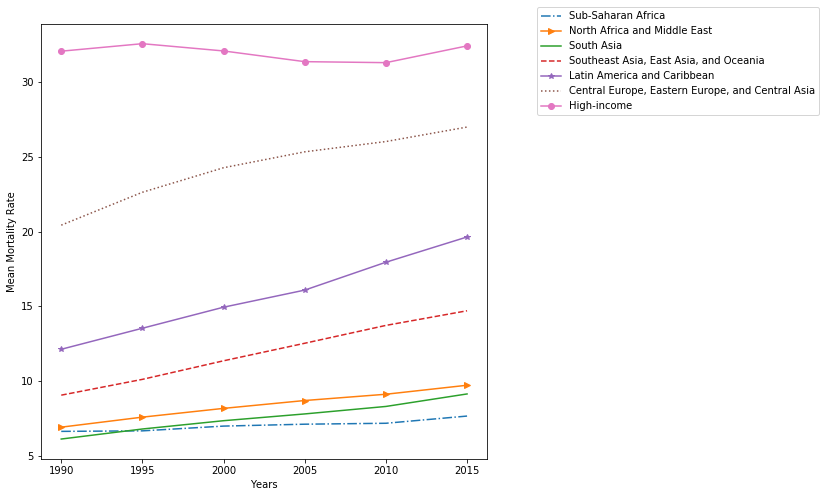

In [26]:
line_s = ['-.','>-',  '-', '--','*-' , ':', 'o-']
plt.figure(figsize=(8,8)) 
for sr in range(filtered_super_region_stat_df.index.size ):
    x = [filtered_super_region_stat_df.columns[i][0] for i in [0,2,4,6,8,10]]
    y = [filtered_super_region_stat_df.iloc[sr,[i][0]] for i in [0,2,4,6,8,10]]
    plt.plot(x, y, line_s[sr], label=filtered_super_region_stat_df.index[sr])

       
plt.xlabel('Years')
plt.ylabel('Mean Mortality Rate')

#plt.title("Simple Plot")

plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()